PREDICTIONS

In [8]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd


In [9]:
# 1. Load your data
data = pd.read_csv('/content/Advertising (2).csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


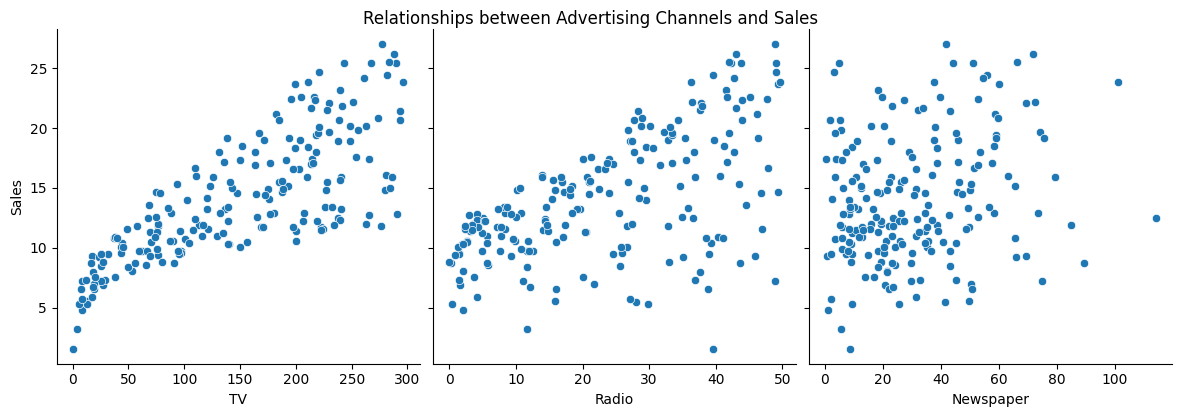

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the unnecessary index column if present
data = data.drop(columns=['Unnamed: 0'], errors='ignore')

# Pairplot to visualize relationships between features and the target variable
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.suptitle("Relationships between Advertising Channels and Sales", y=1.02)
plt.show()

In [10]:
# 2. View the actual column names
print(data.columns)

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [11]:
# 3. Separate features (X) and target (y) using actual column names
X = data[['TV', 'Radio', 'Newspaper']]  # Replace with your actual feature columns from the output above
y = data['Sales']  # Replace with your actual target variable column

In [12]:
# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Save the trained model
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 1.4607567168117603
Mean Squared Error: 3.1740973539761033
R-squared: 0.899438024100912


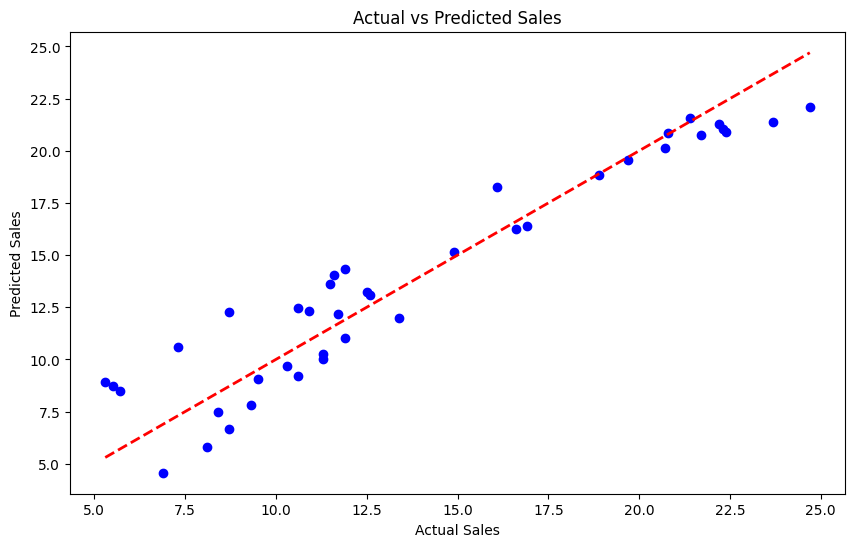

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()